In [13]:
import pandas as pd

In [14]:
df = pd.read_excel("./Pengamatan.ods",
                   sheet_name="pengamatan_pudan")
df["p"] = df["p"].str.upper()

In [15]:
df.sample(5)

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4
23,2025-08-07,P5,4,15.8,16.9,14.1,13.4
160,2025-08-10,P3,1,25.6,25.7,23.5,24.0
87,2025-08-06,P6,3,11.3,9.3,7.7,8.4
50,2025-08-11,P2,4,61.3,62.2,61.0,55.8
117,2025-08-08,P6,3,18.9,17.3,17.8,16.8


In [16]:
df_with_diameter = df
df_with_diameter["diameter"] = df_with_diameter[["diameter_1", "diameter_2", "diameter_3", "diameter_4"]].mean(axis=1)

In [17]:
df_with_diameter

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4,diameter
0,2025-08-07,P1,1,17.1,16.1,15.3,17.2,16.425
1,2025-08-07,P5,1,8.4,8.3,8.0,8.1,8.200
2,2025-08-07,P6,1,15.2,16.1,15.0,14.8,15.275
3,2025-08-07,P4,1,12.6,11.9,12.2,11.5,12.050
4,2025-08-07,P3,1,9.6,8.4,8.3,8.9,8.800
...,...,...,...,...,...,...,...,...
205,2025-08-12,P5,4,41.8,42.5,43.7,40.1,42.025
206,2025-08-12,P3,1,22.7,21.2,22.4,20.6,21.725
207,2025-08-12,P4,4,28.8,35.3,33.6,33.9,32.900
208,2025-08-12,P2,2,64.8,63.1,60.3,55.8,61.000


In [18]:
df_clean = df_with_diameter.groupby(by=["tanggal", "p"]).agg({
    "diameter": "mean"
}).reset_index()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

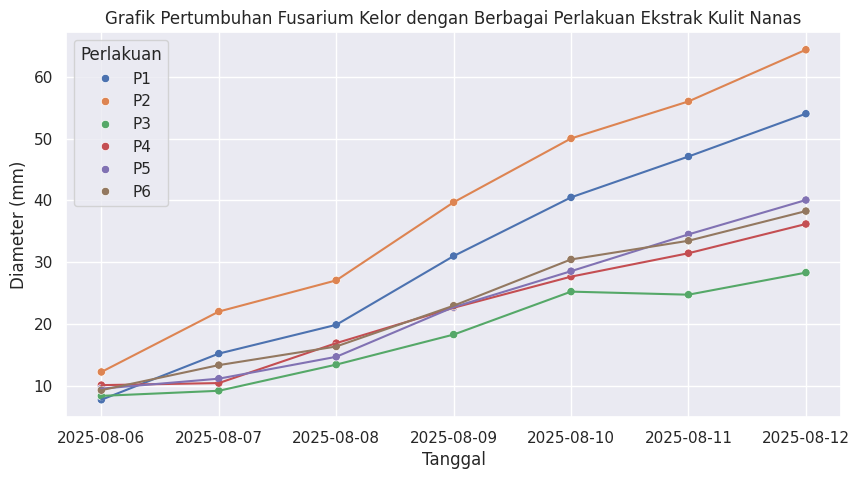

In [23]:
plt.figure(figsize=(10, 5))

sns.set_theme("notebook")

sns.lineplot(data=df_clean,
             x="tanggal",
             y="diameter",
             hue="p",
             legend=None)

sns.scatterplot(data=df_clean,
                x="tanggal",
                y="diameter",
                hue="p")

plt.title("Grafik Pertumbuhan Fusarium Kelor dengan Berbagai Perlakuan Ekstrak Kulit Nanas")

plt.ylabel("Diameter (mm)")

plt.xlabel("Tanggal")

plt.legend(title="Perlakuan")

plt.xticks(ticks=df_clean["tanggal"].unique())

plt.show()

In [25]:
df_with_diameter.groupby(by=["tanggal", "p"]).agg({
    "diameter": "mean"
})

diameter
tanggal    p           
2025-08-06 P1     7.735
           P2    12.230
           P3     8.360
           P4    10.100
           P5     9.535
           P6     9.285
2025-08-07 P1    15.205
           P2    22.010
           P3     9.185
           P4    10.435
           P5    11.145
           P6    13.340
2025-08-08 P1    19.860
           P2    27.055
           P3    13.420
           P4    16.895
           P5    14.685
           P6    16.355
2025-08-09 P1    30.995
           P2    39.700
           P3    18.285
           P4    22.625
           P5    22.725
           P6    22.955
2025-08-10 P1    40.495
           P2    50.030
           P3    25.235
           P4    27.660
           P5    28.545
           P6    30.445
2025-08-11 P1    47.105
           P2    56.025
           P3    24.740
           P4    31.450
           P5    34.500
           P6    33.470
2025-08-12 P1    54.035
           P2    64.385
           P3    28.310
           P4    36.180
           P5    40.060
           P6    38.270